In [0]:
# This program uses Convolutional Neural Networks (CNN) 
# to classify handwritten digits as numbers 0 - 9

In [2]:
#import the libraries
%tensorflow_version 1.x
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Get the image shape
print(X_train.shape)#60000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)
print(X_test.shape)#10000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Take a look at the first image (at index=0) in the training data set as a numpy array, This shows the image as a series of pixel values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Print the image label
y_train[0]

5

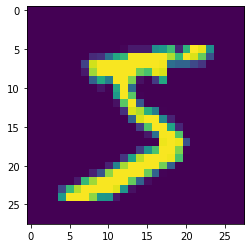

In [7]:
#Show the image as a picture
plt.imshow(X_train[0])

In [0]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 178s 3ms/step - loss: 11.1447 - acc: 0.3081 - val_loss: 9.9769 - val_acc: 0.3807
Epoch 2/10
60000/60000 [==============================] - 177s 3ms/step - loss: 10.1264 - acc: 0.3716 - val_loss: 9.8362 - val_acc: 0.3896
Epoch 3/10
60000/60000 [==============================] - 176s 3ms/step - loss: 10.0987 - acc: 0.3733 - val_loss: 10.1608 - val_acc: 0.3696
Epoch 4/10
60000/60000 [==============================] - 175s 3ms/step - loss: 10.1503 - acc: 0.3702 - val_loss: 10.0132 - val_acc: 0.3786
Epoch 5/10
60000/60000 [==============================] - 175s 3ms/step - loss: 9.9456 - acc: 0.3829 - val_loss: 9.9264 - val_acc: 0.3841
Epoch 6/10
60000/60000 [==============================] - 175s 3ms/step - loss: 9.9964 - acc: 0.3798 - val_loss: 9.9648 - val_acc: 0.3817
Epoch 7/10
600

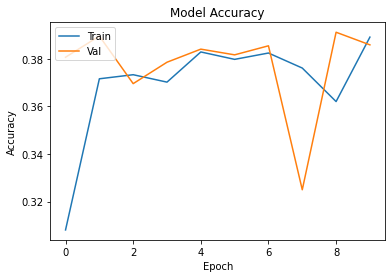

In [13]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [14]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:4])

[7 6 1 1]
[7 2 1 0]


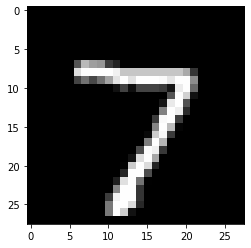

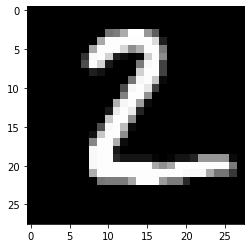

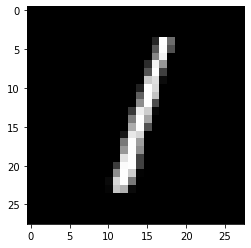

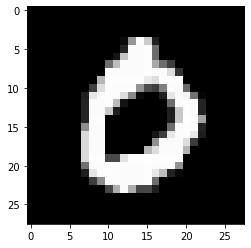

In [16]:
#Show the first 4 images as pictures
for i in range(0,4):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()